In [149]:
import pandas as pd

In [150]:
df = pd.read_csv("..\data\\rainfall.csv")

In [151]:
df.head(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3
9,10,1017.5,18.5,18.0,17.2,15.5,85,91,yes,0.0,70.0,37.7


In [152]:
df.tail(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
356,22,1020.3,20.6,19.9,18.7,17.6,87,88,yes,0.3,60.0,27.3
357,23,1017.8,22.3,21.1,19.8,19.6,91,79,yes,0.0,40.0,15.0
358,24,1016.8,24.7,22.3,21.1,20.7,91,70,yes,6.0,40.0,9.4
359,25,1020.4,21.4,18.2,16.1,13.5,75,89,yes,0.7,10.0,27.6
360,26,1020.6,19.7,17.9,16.9,13.3,74,87,no,0.6,30.0,21.6
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [153]:
for col in df.columns:
    print(col)

day
pressure
maxtemp
temparature
mintemp
dewpoint
humidity
cloud
rainfall
sunshine
winddirection
windspeed


In [154]:
print('Column', ' \t', 'Datatype')
print('-------------------------')
for col in df.columns:
    print(col, ' \t', df[col].dtype)

Column  	 Datatype
-------------------------
day  	 int64
pressure  	 float64
maxtemp  	 float64
temparature  	 float64
mintemp  	 float64
dewpoint  	 float64
humidity  	 int64
cloud  	 int64
rainfall  	 object
sunshine  	 float64
winddirection  	 float64
windspeed  	 float64


In [155]:
df.sunshine = df.sunshine.replace({float('0.0'): float('NaN')})

In [156]:
df.head()


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,NaN,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,NaN,40.0,13.7


### ** The day column doesn't have any effect on the outcome of our similaraties and distances between any of the two column ** ###

In [157]:
df.drop('day', axis=1, inplace=True)

In [158]:
import matplotlib.pyplot as plt

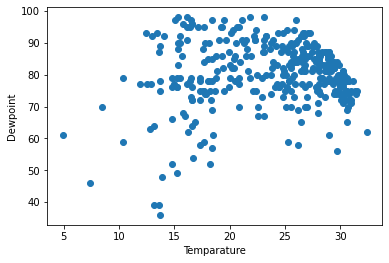

In [159]:
plt.scatter(df.temparature, df.humidity)
plt.xlabel('Temparature')
plt.ylabel('Dewpoint')
plt.show()

### The humidity represents a percentage of water vapor in the air that changes when the air temperature changes, they have a negative correlation. ###

In [160]:
df.drop(['pressure','maxtemp','mintemp','dewpoint','cloud','rainfall','sunshine','winddirection','windspeed'], axis=1, inplace=True)

In [161]:
print(df)

     temparature  humidity
0           18.3        72
1           18.9        81
2           19.3        95
3           20.6        90
4           20.7        95
..           ...       ...
361         17.7        84
362         17.3        75
363         17.7        75
364         17.3        78
365         17.8        74

[366 rows x 2 columns]


In [162]:
import numpy as np

In [163]:
cov = np.cov(df.temparature, df.humidity)[0,1]

In [164]:
print('Covariance: ', cov)

Covariance:  5.216239988023054


In [165]:
correl = np.corrcoef(df.temparature, df.humidity)[0,1]

In [166]:
print('Correlation: ', correl)

Correlation:  0.09202962065308118


In [167]:
from sklearn.metrics.pairwise import cosine_similarity

In [168]:
cos_sim = cosine_similarity([df.temparature],[df.humidity])[0,0]

In [169]:
print('Cosine Similarity: ', correl)

Cosine Similarity:  0.09202962065308118
